In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (4, 3)

df = pd.read_csv(r"./datasets/employees.csv")
df.head(2)

,Name,Salary,Designation,Age,Gender,Owns Car
0,Claire,88962,Manager,35,Female,Yes
1,Darrin,67659,Team Lead,26,Male,No


In [5]:
df.Salary.head(2)

0    88962
1    67659
Name: Salary, dtype: int64

In [ ]:
df[df.Salary > 30000]  # fillter is applied to the rows

In [9]:
df.loc[[0,1,2], ["Name", "Salary"]]  # extract data from df based on column and row labels

,Name,Salary
0,Claire,88962
1,Darrin,67659
2,Sean,117501


In [17]:
# Modify salary of employees where salary is > 600000 to 90000
df.Salary[df.Designation == "Manager"]

0      88962
2     117501
11    115116
14    109132
15     83327
Name: Salary, dtype: int64

In [26]:
df["Salary"][df.Designation == "Manager"] = 90000 # Avoid this syntax

C:\Users\vaide\AppData\Local\Temp\ipykernel_10640\1537389950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Salary"][df.Designation == "Manager"] = 900000


In [29]:
df.loc[df.Designation == "Manager", "Salary"] = 1000000  # Use this syntax

In [30]:
df.Salary.mean()

np.float64(210929.13333333333)

In [31]:
df.tail() # gives bottom rows

,Name,Salary,Designation,Age,Gender,Owns Car
25,Jack,13058,Developer,25,Male,Yes
26,Ted,26180,Team Lead,27,Male,Yes
27,Kunst,23259,Developer,24,Male,No
28,Paul,34248,Team Lead,27,Male,Yes
29,Brendan,27416,Team Lead,30,Male,Yes


## Dataframe

A DataFrame is two dimensional data structure where the data is arranged in the tabular format in rows and columns

#### DataFrame features:

- Columns can be of different data types
- Size of dataframe can be changes
- Axes(rows and columns) are labeled
- Arithmetic operations can be performed on rows and columns

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (4, 3)

df = pd.read_csv(r"./datasets/employees.csv")
df.head(2)

,Name,Salary,Designation,Age,Gender,Owns Car
0,Claire,88962,Manager,35,Female,Yes
1,Darrin,67659,Team Lead,26,Male,No


### Understanding Data in Dataframe

- `df.shape` - gives the size of the dataframe in the format (row_count x column_count)
- `df.dtypes` - returns a Series with the data type of each column
- `df.info()` - prints information about a DataFrame including the index dtype and columns, non-null values and memory usage
- `df.head()` - prints the first 5 rows of you dataset including column header and the content of each row
- `df.tail()` - prints the last 5 rows of you dataset including column header and the content of each row

In [33]:
df.shape

(30, 6)

In [34]:
df.dtypes

Name           object
Salary          int64
Designation    object
Age             int64
Gender         object
Owns Car       object
dtype: object

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         30 non-null     object
 1   Salary       30 non-null     int64 
 2   Designation  30 non-null     object
 3   Age          30 non-null     int64 
 4   Gender       30 non-null     object
 5   Owns Car     30 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.5+ KB


In [36]:
df.head(2)

,Name,Salary,Designation,Age,Gender,Owns Car
0,Claire,88962,Manager,35,Female,Yes
1,Darrin,67659,Team Lead,26,Male,No


In [37]:
df.tail(2)

,Name,Salary,Designation,Age,Gender,Owns Car
28,Paul,34248,Team Lead,27,Male,Yes
29,Brendan,27416,Team Lead,30,Male,Yes


In [52]:
df.columns  # returns a sequence of headers

Index(['Name', 'Salary', 'Designation', 'Age', 'Gender', 'Owns Car'], dtype='object')

In [53]:
df.index  # returns sequence of row label

RangeIndex(start=0, stop=30, step=1)

## Read data from a file and perform data cleaning

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (4, 3)

df = pd.read_csv(r"./datasets/coffee_sales.csv")
df.head()

,This is dummy data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Date,Franchise,City,Product,Sales,Profit,Target Profit,Target Sales
3,NaN,1-Jan-21,M1,Mumbai,Amaretto,$219.00,$94.00,$100.00,$220.00
4,NaN,1-Feb-21,M1,Mumbai,Amaretto,$140.00,$34.00,$50.00,$140.00


###### Approach 1

In [58]:
df = pd.read_csv(r"./datasets/coffee_sales.csv", header=3, usecols = range(1, 9))
df.head()

,Date,Franchise,City,Product,Sales,Profit,Target Profit,Target Sales
0,1-Jan-21,M1,Mumbai,Amaretto,$219.00,$94.00,$100.00,$220.00
1,1-Feb-21,M1,Mumbai,Amaretto,$140.00,$34.00,$50.00,$140.00
2,1-Mar-21,M1,Mumbai,Amaretto,$145.00,-$2.00,$30.00,$180.00
3,1-Apr-21,M1,Mumbai,Amaretto,$45.00,$11.00,$20.00,$40.00
4,1-May-21,M1,Mumbai,Amaretto,$120.00,$13.00,$30.00,$120.00


#### Check for null values
`df.isna()` - Detect missing values. Return a boolean same-sized object indicating if the values are NA.

In [61]:
df.isna().sum()  # returns no of null values in each column

Unnamed: 0       4248
Date                0
Franchise           0
City                0
Product             0
Sales               0
Profit              0
Target Profit     188
Target Sales        0
dtype: int64

In [62]:
df.isna().any() # returns true for a column if it contains atleast 1 null value

Unnamed: 0        True
Date             False
Franchise        False
City             False
Product          False
Sales            False
Profit           False
Target Profit     True
Target Sales     False
dtype: bool

In [63]:
df.isna().all() # returns true for a column if it contains atleast 1 null value

Unnamed: 0        True
Date             False
Franchise        False
City             False
Product          False
Sales            False
Profit           False
Target Profit    False
Target Sales     False
dtype: bool

#### Remove/Replace nulls

- `df.fillna(value=None, inplace=False)` - Fill NA/NaN values using the specified method.
- `df.dropna(axis = 0, how = "any", inplace = False)`
    - axis 0 for row or 1 for column
    - how - {any or all}

In [67]:
df.dropna(axis = 1, how = "all")

,Date,Franchise,City,Product,Sales,Profit,Target Profit,Target Sales
0,1-Jan-21,M1,Mumbai,Amaretto,$219.00,$94.00,$100.00,$220.00
1,1-Feb-21,M1,Mumbai,Amaretto,$140.00,$34.00,$50.00,$140.00
2,1-Mar-21,M1,Mumbai,Amaretto,$145.00,-$2.00,$30.00,$180.00
3,1-Apr-21,M1,Mumbai,Amaretto,$45.00,$11.00,$20.00,$40.00
4,1-May-21,M1,Mumbai,Amaretto,$120.00,$13.00,$30.00,$120.00
...,...,...,...,...,...,...,...,...
4243,1-Aug-26,M1,Mumbai,Regular Espresso,$719.00,$565.00,$390.00,$660.00
4244,1-Sep-26,M1,Mumbai,Regular Espresso,$81.00,-$4.00,$10.00,$70.00
4245,1-Oct-26,M1,Mumbai,Regular Espresso,$326.00,$129.00,$80.00,$290.00
4246,1-Nov-26,M1,Mumbai,Regular Espresso,$700.00,$463.00,$320.00,$640.00


In [75]:
df["Target Profit"].fillna(0, inplace=True)

C:\Users\vaide\AppData\Local\Temp\ipykernel_10640\501084714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Target Profit"].fillna(0, inplace=True)


##### Note - 
This is older syntax New syntax to be followed is - `df.method({col: value}, inplace=True)`

In [76]:
df.fillna({"Target Profit" : 0}, inplace=True)

#### Handing duplicates

In [ ]:
df.duplicated().any()

In [ ]:
df.drop_duplicates()

#### Data Cleaning

###### Ex. Convert all numeric column to float

In [ ]:
# using apply() - takes function object as argument
func = lambda strg : float(strg.replace("$", ""))
df.Sales.apply(func)

In [ ]:
df.Sales.str.replace("$", "").astype(float)

In [84]:
# Example - 
profit = "($1,200)"  # -1200
str.maketrans("(", "-", "$,)")  # old, new, remove
profit.translate(str.maketrans("(", "-", "$,)"))

'-1200'

In [133]:
str.maketrans("(", "-", "$,)")

{40: 45, 36: None, 44: None, 41: None}

In [134]:
strg = "singapore"
strg.translate(str.maketrans("aeiou", "*****"))

's*ng*p*r*'

In [136]:
strg = "singapore city"
strg.translate(str.maketrans("aeiou", "@3!0^", " "))

's!ng@p0r3c!ty'

In [137]:
help(str.maketrans)

Help on built-in function maketrans:

maketrans(...)
    Return a translation table usable for str.translate().

    If there is only one argument, it must be a dictionary mapping Unicode
    ordinals (integers) or characters to Unicode ordinals, strings or None.
    Character keys will be then converted to ordinals.
    If there are two arguments, they must be strings of equal length, and
    in the resulting dictionary, each character in x will be mapped to the
    character at the same position in y. If there is a third argument, it
    must be a string, whose characters will be mapped to None in the result.



In [132]:
str.maketrans("", "", "$,")

{36: None, 44: None}

In [91]:
trans_obj = str.maketrans("", "", "$,")
df.Sales = df.Sales.str.translate(trans_obj).astype(float)
df.Profit = df.Profit.str.translate(trans_obj).astype(float)
df["Target Profit"] = df["Target Profit"].str.translate(trans_obj).astype(float)
df["Target Sales"] = df["Target Sales"].str.translate(trans_obj).astype(float)

In [92]:
df.head()

,Date,Franchise,City,Product,Sales,Profit,Target Profit,Target Sales
0,1-Jan-21,M1,Mumbai,Amaretto,219.0,94.0,100.0,220.0
1,1-Feb-21,M1,Mumbai,Amaretto,140.0,34.0,50.0,140.0
2,1-Mar-21,M1,Mumbai,Amaretto,145.0,-2.0,30.0,180.0
3,1-Apr-21,M1,Mumbai,Amaretto,45.0,11.0,20.0,40.0
4,1-May-21,M1,Mumbai,Amaretto,120.0,13.0,30.0,120.0


#### Add Column by calculation to the dataframe

###### Ex. Check the status of target sales and add it to the dataframe as a new column

In [94]:
df["Sales Target Status"] = np.where(df.Sales >= df["Target Sales"], "Achieved", "Not Achieved")
df.head(3)

,Date,Franchise,City,Product,Sales,Profit,Target Profit,Target Sales,Sales Target Status
0,1-Jan-21,M1,Mumbai,Amaretto,219.0,94.0,100.0,220.0,Not Achieved
1,1-Feb-21,M1,Mumbai,Amaretto,140.0,34.0,50.0,140.0,Achieved
2,1-Mar-21,M1,Mumbai,Amaretto,145.0,-2.0,30.0,180.0,Not Achieved


#### Working with date column

###### Ex. Convert date column to date type

In [98]:
df.Date = pd.to_datetime(df.Date, format = "mixed")
df.head(2)

,Date,Franchise,City,Product,Sales,Profit,Target Profit,Target Sales,Sales Target Status
0,2021-01-01,M1,Mumbai,Amaretto,219.0,94.0,100.0,220.0,Not Achieved
1,2021-02-01,M1,Mumbai,Amaretto,140.0,34.0,50.0,140.0,Achieved


In [104]:
df.Date = pd.to_datetime(df.Date, format = "mixed")
df.insert(1, "Year", df.Date.dt.year)
df.insert(2, "Month_no", df.Date.dt.month)
df.insert(3, "Month", df.Date.dt.month_name())
df.head(3)

,Date,Year,Month_no,Month,Franchise,City,Product,Sales,Profit,Target Profit,Target Sales,Sales Target Status
0,2021-01-01,2021,1,January,M1,Mumbai,Amaretto,219.0,94.0,100.0,220.0,Not Achieved
1,2021-02-01,2021,2,February,M1,Mumbai,Amaretto,140.0,34.0,50.0,140.0,Achieved
2,2021-03-01,2021,3,March,M1,Mumbai,Amaretto,145.0,-2.0,30.0,180.0,Not Achieved


#### Renaming column names

In [ ]:
# Rename all column headers
df.columns = [col1, col2, col3, ......]  # len([]) = no of cols, and sequence must also be the same

In [108]:
# using rename()
df.rename({"Month_no" : "Month_NO"}, axis = 1).head(1)  # inplace = True for modifying original df

,Date,Year,Month_NO,Month,Franchise,City,Product,Sales,Profit,Target Profit,Target Sales,Sales Target Status
0,2021-01-01,2021,1,January,M1,Mumbai,Amaretto,219.0,94.0,100.0,220.0,Not Achieved


#### Replace Values

###### Ex. Replace city Mumbai with Bombay

In [118]:
df.City.replace({"Mumbai" : "Bombay"}, inplace=True)
df.head(2)

,Date,Year,Month_no,Month,Franchise,City,Product,Sales,Profit,Target Profit,Target Sales,Sales Target Status
0,2021-01-01,2021,1,January,M1,Bombay,Amaretto,219.0,94.0,100.0,220.0,Not Achieved
1,2021-02-01,2021,2,February,M1,Bombay,Amaretto,140.0,34.0,50.0,140.0,Achieved


#### Sorting Dafatrame
- df.sort_values(`ascending=True`, `inplace=False`, `na_position = {"first","last"}`)
- df.sort_index(`ascending=True`, `inplace=False`)

In [ ]:
df.sort_index()

In [ ]:
df.sort_values("Sales", ascending=False)

#### Ranking Dataframe
- df[col].rank(`ascending=False`, `method={"average","min","dense"}`, `na_option = {"top","bottom"}`)

In [125]:
df["Sales"].rank()

0       3072.0
1       2166.5
2       2255.5
3        138.5
4       1596.5
         ...  
4243    4215.0
4244     699.0
4245    3717.5
4246    4210.0
4247     188.0
Name: Sales, Length: 4248, dtype: float64

In [129]:
pd.Series([10, 9, 9, 8, 8, 8, 7]).rank(ascending=False, method="dense")

0    1.0
1    2.0
2    2.0
3    3.0
4    3.0
5    3.0
6    4.0
dtype: float64

#### Appraoch 2 - Final Code 

In [130]:
df = pd.read_csv(r"./datasets/coffee_sales.csv", header=3)
df.dropna(axis = 1, how = "all", inplace=True)  # drops eniter null col
df.dropna(axis = 0, how = "all", inplace=True)  # drops entire null row
df.fillna({"Target Profit" : 0}, inplace=True)  # replace null value in target col with 0

# converting numeric column to float
trans_obj = str.maketrans("", "", "$,")
df.Sales = df.Sales.str.translate(trans_obj).astype(float)
df.Profit = df.Profit.str.translate(trans_obj).astype(float)
df["Target Profit"] = df["Target Profit"].str.translate(trans_obj).astype(float)
df["Target Sales"] = df["Target Sales"].str.translate(trans_obj).astype(float)
df.Date = pd.to_datetime(df.Date, format = "mixed")
df.insert(1, "Year", df.Date.dt.year)
df.insert(2, "Month_no", df.Date.dt.month)
df.insert(3, "Month", df.Date.dt.month_name())

df["Sales Target Status"] = np.where(df.Sales >= df["Target Sales"], "Achieved", "Not Achieved")


df.head()

,Date,Year,Month_no,Month,Franchise,City,Product,Sales,Profit,Target Profit,Target Sales,Sales Target Status
0,2021-01-01,2021,1,January,M1,Mumbai,Amaretto,219.0,94.0,100.0,220.0,Not Achieved
1,2021-02-01,2021,2,February,M1,Mumbai,Amaretto,140.0,34.0,50.0,140.0,Achieved
2,2021-03-01,2021,3,March,M1,Mumbai,Amaretto,145.0,-2.0,30.0,180.0,Not Achieved
3,2021-04-01,2021,4,April,M1,Mumbai,Amaretto,45.0,11.0,20.0,40.0,Achieved
4,2021-05-01,2021,5,May,M1,Mumbai,Amaretto,120.0,13.0,30.0,120.0,Achieved


In [38]:
df["Owns Car"].value_counts()

Owns Car
Yes    20
No     10
Name: count, dtype: int64

In [41]:
df["Owns Car"].value_counts(normalize=True).round(2) * 100

Owns Car
Yes    67.0
No     33.0
Name: proportion, dtype: float64

<Axes: xlabel='Owns Car'>

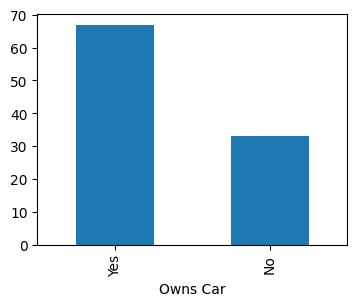

In [42]:
(df["Owns Car"].value_counts(normalize=True).round(2) * 100).plot(kind = "bar")

In [44]:
(df["Owns Car"].value_counts(normalize=True).round(2) * 100).to_frame().reset_index()

,Owns Car,proportion
0,Yes,67.0
1,No,33.0
